## K-means for image compression

### Steps of the algorithm

* Randomly select k points from the dataset to be centroids
* Assign every ofther point to its closest centroid
* Re-compute centroids for each class and repeat step 2 for some number of epochs
* Repeat the algorithm couple times in case random selection of centroids gives suboptimal results and pick best result (that has smallest distance between points and centroids)

In [ ]:
import numpy as np

#### Implement find_closest_centroids function

In [ ]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example

    Args:
        X (ndarray): (m, n) Input values
        centroids (ndarray): (K, n) centroids

    Returns:
        idx (array_like): (m,) closest centroids

    """

    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        idx[i] = np.argmin(np.diagonal(np.dot(centroids - X[i, :], (centroids - X[i, :]).T)))

    return idx

#### Compute centroids means

In [ ]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the
    data points assigned to each centroid.

    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each
                       example in X. Concretely, idx[i] contains the index of
                       the centroid closest to example i
        K (int):       number of centroids

    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """

    m, n = X.shape

    centroids = np.zeros((K, n))

    for i in range(K):
        centroids[i] = X[idx == i].mean(axis = 0)

    return centroids

#### Initialize random centroids (centroids are selected among data points)

In [ ]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be
    used in K-Means on the dataset X

    Args:
        X (ndarray): Data points
        K (int):     number of centroids/clusters

    Returns:
        centroids (ndarray): Initialized centroids
    """

    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[:K]]

    return centroids

#### Calculate summed square distance between points and centroids of their clusters

In [ ]:
def kmeans_distance(X, idx, centroids):
  """
  Args:
    X (ndarray):  (m, n) Input values,
    idx (ndarray): (m,) Cluster labels
    centroids (ndarray): (K, n) Coordinates of K centroids
  """
  K = centroids.shape[0]

  distance = 0
  for i in range(K):
    distance += np.sum(np.sum((X[idx == i] - centroids[i])**2, axis = 1), axis = 0)

  return distance


#### Implement K-Means

In [ ]:
def KMeans(X, K, num_trials = 10, num_iter = 20):
  """
  Runs K-means for num_trials and selects best clustering i.e. clustering that minimizes
  sum of squared distances between points and centroids of their clusters

  Args:
    X (ndarray):  (m, n) Input values
    K (int):     number of centroids/clusters

  Returns:
    best_idx (ndarray): (m,) labels of best performing clustering
    best_centroids (ndarray): (K,n) closest centroids
    best_distance (float): summed squared distance between points and centers of their clusters
  """

  # Run first trial of KMeans
  centroids = kMeans_init_centroids(X, K)

  for i in range(num_iter):
    idx = find_closest_centroids(X, centroids)
    centroids = compute_centroids(X, idx, K)

  best_idx = idx
  best_centroids = centroids

  # Calculate the summed square distance
  best_distance = kmeans_distance(X, idx, centroids)

  # Run the rest of trials:
  for i in range(2, num_trials):
    centroids = kMeans_init_centroids(X, K)
    for i in range(num_iter):
      idx = find_closest_centroids(X, centroids)
      centroids = compute_centroids(X, idx, K)
      distance = kmeans_distance(X, idx, centroids)

      if distance < best_distance:
        best_distance = distance
        best_idx = idx
        best_centroids = centroids

  return best_idx, best_centroids, best_distance

### Create and plot toy dataset for testing

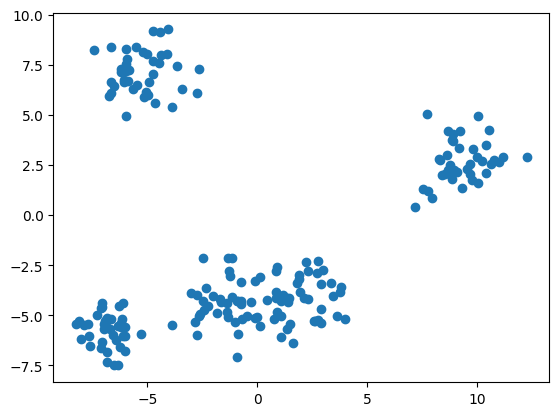

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples = 200, n_features = 2, centers = 5)

plt.scatter(X[:,0], X[:,1])
plt.show()

#### Run K-Means on toy dataset with K = 5

In [ ]:
idx, centroids, distance = KMeans(X, K=5, num_trials = 10, num_iter = 20)

#### Plot the results

<ipython-input-9-4b909cea32b3>:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "or" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(centroids[:,0], centroids[:,1], 'or', marker = 'X', markersize = 10)


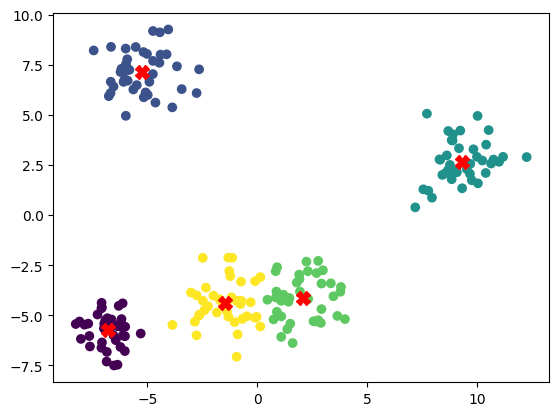

In [ ]:
plt.scatter(X[:,0], X[:,1], c = idx)
plt.plot(centroids[:,0], centroids[:,1], 'or', marker = 'X', markersize = 10)
plt.show()

#### Image compression with K-Means

##### Try to compress the following photo using 16 colors

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRDSK4hk5d987Y4Aop4VHPZkLM2KjjsCaoh7w&usqp=CAU">

In [ ]:
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRDSK4hk5d987Y4Aop4VHPZkLM2KjjsCaoh7w&usqp=CAU

--2023-09-19 06:29:10--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRDSK4hk5d987Y4Aop4VHPZkLM2KjjsCaoh7w
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 74.125.143.138, 74.125.143.102, 74.125.143.113, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|74.125.143.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13461 (13K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcRDSK4hk5d987Y4Aop4VHPZkLM2KjjsCaoh7w’

images?q=tbn:ANd9Gc 100%[===================>]  13.15K  --.-KB/s    in 0s      

2023-09-19 06:29:10 (67.4 MB/s) - ‘images?q=tbn:ANd9GcRDSK4hk5d987Y4Aop4VHPZkLM2KjjsCaoh7w’ saved [13461/13461]



In [ ]:
photo = plt.imread("images?q=tbn:ANd9GcRDSK4hk5d987Y4Aop4VHPZkLM2KjjsCaoh7w")

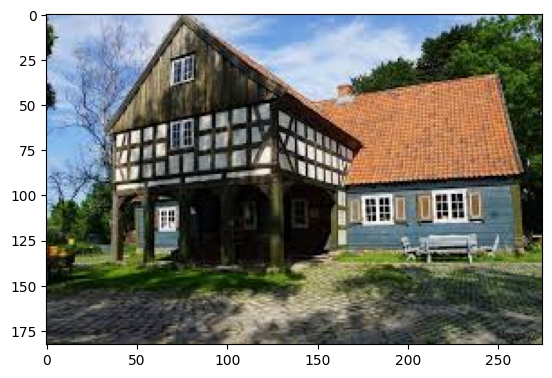

In [ ]:
plt.imshow(photo)
plt.show()

In [ ]:
# Check photo shape
photo.shape

(183, 275, 3)

In [ ]:
# Reshape (each row will contain RGB values) and rescale the original image

X_img = photo.reshape(183*275, 3)
X_img = X_img/255.

In [ ]:
# Run K-Means
idx, centroids, distance = KMeans(X_img, K=16, num_trials = 10, num_iter = 10)

In [ ]:
# Find the closest centroid of each pixel
# idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
for i in range(16):
  X_img[idx == i, :] = centroids[i]

# Reshape image into proper dimensions
# photo_compressed = np.reshape(photo_compressed, photo.shape)
photo_compressed = np.reshape(X_img, photo.shape)

#### Plot the original and compressed image

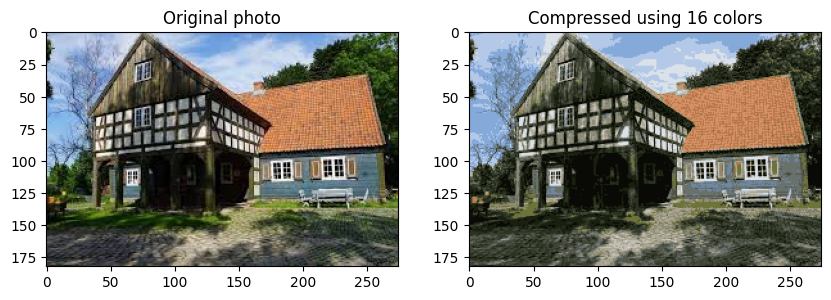

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(10, 6)

ax[0].imshow(photo)
ax[0].set(title = 'Original photo')

ax[1].imshow(photo_compressed)
ax[1].set(title = 'Compressed using 16 colors')

plt.show()